<a href="https://colab.research.google.com/github/diogenesjusto/FIAP-On-Line-Graduation/blob/main/code/6_modelos_preditivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/wine/red_wine4_30.csv", encoding='latin-1')
df.head(n=15)

,Unnamed: 0,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99
5,6,California Zinfandel,2009,United States,California,A J,3.5,25,4.99
6,7,Tinto,2017,Portugal,Tejo,Xairel,3.2,49,4.25
7,8,Merlot,2015,United States,California,Crane Lake,3.1,198,4.99
8,9,Pinot Noir,2016,United States,California,Coastal Vines Cellars,3.5,128,4.99
9,10,Cabernet Sauvignon,2018,Chile,Central Valley,Frontera,3.3,1596,5.00


In [2]:
# 1 - Carga das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# 2 - Carga dos dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/wine/red_wine4_30.csv", encoding='latin-1')
df.head()

,Unnamed: 0,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99


In [4]:
# 3 - Preparação dos dados

In [5]:
# 4 - Separação das amostras de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wine_year', 'wine_price']], df['wine_rating'],test_size=0.3266, random_state=33)

In [6]:
# 5 - Construção do modelo
mod = LinearRegression()
mod.fit(x_treino,y_treino)

LinearRegression()

In [7]:
# 6 - Avaliação do modelo
y_prev = mod.predict(x_teste)
mean_squared_error(y_teste, y_prev)

0.04082351716560254

In [8]:
ev = pd.DataFrame({"prev": y_prev, "real": y_teste})
ev.head(n=10)

,prev,real
253,3.534321,3.5
2052,3.648876,3.9
3695,3.715762,3.3
630,3.592574,3.9
6594,3.847883,3.7
5958,3.787866,3.7
6489,3.833733,3.8
9552,3.913194,3.9
6112,3.795111,3.6
8700,3.920812,3.9


In [9]:
ev['erro_absoluto'] = y_prev-y_teste
ev['erro_relativo'] = (y_prev-y_teste)/y_teste
ev.head(n=10)

,prev,real,erro_absoluto,erro_relativo
253,3.534321,3.5,0.034321,0.009806
2052,3.648876,3.9,-0.251124,-0.064391
3695,3.715762,3.3,0.415762,0.125988
630,3.592574,3.9,-0.307426,-0.078827
6594,3.847883,3.7,0.147883,0.039968
5958,3.787866,3.7,0.087866,0.023748
6489,3.833733,3.8,0.033733,0.008877
9552,3.913194,3.9,0.013194,0.003383
6112,3.795111,3.6,0.195111,0.054197
8700,3.920812,3.9,0.020812,0.005337


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a0b5ff3d0>]],
      dtype=object)

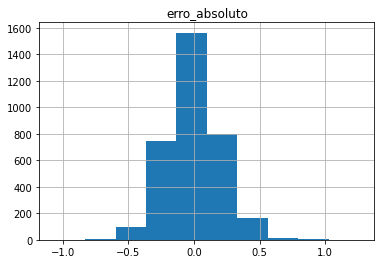

In [10]:
ev.hist('erro_absoluto')

In [11]:
import numpy as np
import scipy.stats as st

#create 95% confidence interval for population mean weight
data = ev[['erro_absoluto']].to_numpy()
ci = st.t.interval(alpha=0.95, df=len(ev.index)-1, loc=np.mean((data)), scale=np.std(data))
print(ci)

(-0.3974767426788493, 0.39480351539171527)


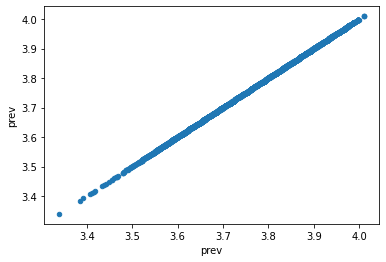

In [12]:
# Gráfico de dispersão consideração situação "ideal", 
# > valores previstos iguais ao reais
ev.plot.scatter(x="prev", y="prev")

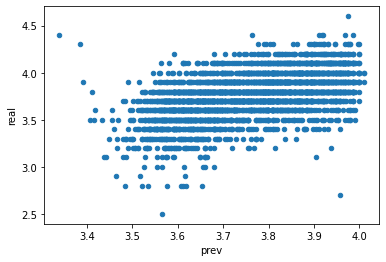

In [13]:
# Gráfico de dispersão previsto x real 
ev.plot.scatter(x="prev", y="real")

In [14]:
!pip install mpl_scatter_density
import mpl_scatter_density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 655 kB 4.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 


In [15]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


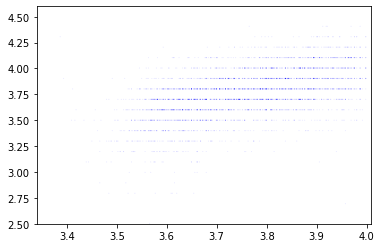

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(y_prev, y_teste, color='blue')

In [17]:
# Coeficiente de correlação linear
ev[['prev','real']].corr()

,prev,real
prev,1.000000,0.530011
real,0.530011,1.000000


In [18]:
# Cálculo do erro quadrático
ev['erro_quadrado']=ev['erro_absoluto']**2
ev

,prev,real,erro_absoluto,erro_relativo,erro_quadrado
253,3.534321,3.5,0.034321,0.009806,0.001178
2052,3.648876,3.9,-0.251124,-0.064391,0.063063
3695,3.715762,3.3,0.415762,0.125988,0.172858
630,3.592574,3.9,-0.307426,-0.078827,0.094511
6594,3.847883,3.7,0.147883,0.039968,0.021869
...,...,...,...,...,...
4265,3.754047,3.6,0.154047,0.042791,0.023730
1556,3.630109,3.6,0.030109,0.008364,0.000907
8806,3.907714,3.7,0.207714,0.056139,0.043145
4461,3.765382,3.4,0.365382,0.107465,0.133504


In [28]:
# Cálculo de Métricas de Erro
SSE = sum(ev['erro_quadrado'])
MSE = ev['erro_quadrado'].mean()
RMSE = np.sqrt(MSE)

# Cálculo do MSE utilizando o sklearn (repare que já utilizamos esta função anteriormente)
MSE_sklearn = mean_squared_error(y_teste, y_prev)

[SSE, MSE, MSE_sklearn,RMSE]

[138.47337022572387,
 0.04082351716560254,
 0.04082351716560254,
 0.20204830404040156]

In [2]:
# 1 - Carga das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 2 - Carga dos dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/arvore_titanic.csv")
 
# 3 - Preparação dos dados
 
# 4 - Separação das amostras de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['Pclass']], df['Survived'],test_size=0.3266, random_state=33)
 
# 5 - Construção do modelo
mod = tree.DecisionTreeClassifier()
mod.fit(x_treino,y_treino)
 
# 6 - Avaliação do modelo
y_prev = mod.predict(x_teste)
accuracy_score(y_teste, y_prev)


0.678082191780822

In [4]:
ev = pd.DataFrame({"prev": y_prev, "real": y_teste})
ev.head(n=10)

,prev,real
297,1,0
71,0,0
631,0,0
567,0,0
21,0,1
187,1,1
607,1,1
437,0,1
686,0,0
417,0,1


In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste, y_prev)

array([[156,  27],
       [ 67,  42]])

In [7]:
# Matriz de Confusão
pd.crosstab(y_prev,y_teste, margins=True)

Survived,0,1,All
row_0,,,
0,156,67,223
1,27,42,69
All,183,109,292


In [8]:
acc = accuracy_score(y_teste, y_prev)
p = precision_score(y_teste, y_prev)
r = recall_score(y_teste, y_prev)

[acc, p, r]

[0.678082191780822, 0.6086956521739131, 0.3853211009174312]